## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')].copy()
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges').copy()

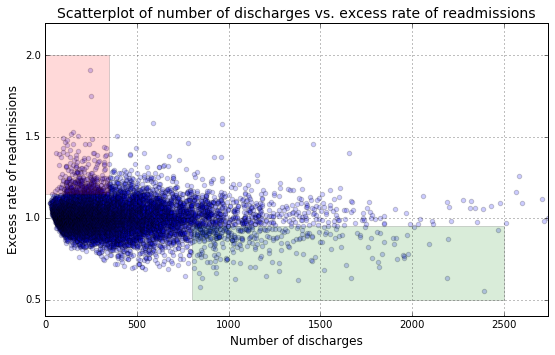

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

   <br><br><br><br><br><center>*Exercise solution begins below.*</center><br><br><br><br><br>

---

# Response to preliminary report

The preliminary report hinges on the idea that there is a negative correlation between the excess readmission ratio and the number of discharges. Let's test this claim formally:

In [5]:
import scipy.stats as stats
# Calculate correlation coefficient r and the p-value:
stats.pearsonr(x,y)

(-0.093095542875904408, 1.5022756426464526e-23)

It is true that there is a statistically significant negative correlation, **but it is very weak** ($r\approx -0.09$). To test some other claims, we will use Allen Downey's ``HypothesisTest`` and ``DiffMeansPermute`` classes:

In [6]:
class HypothesisTest(object):
    """Represents a hypothesis test."""

    def __init__(self, data):
        """Initializes.

        data: data in whatever form is relevant
        """
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)
        self.test_stats = None

    def PValue(self, iters=1000):
        """Computes the distribution of the test statistic and p-value.

        iters: number of iterations

        returns: float p-value
        """
        self.test_stats = np.array([self.TestStatistic(self.RunModel()) 
                                       for _ in range(iters)])

        count = sum(self.test_stats >= self.actual)
        return count / iters

    def MaxTestStat(self):
        """Returns the largest test statistic seen during simulations.
        """
        return max(self.test_stats)

    def PlotHist(self, label=None):
        """Draws a Cdf with vertical lines at the observed test stat.
        """
        ys, xs, patches = pyplot.hist(ht.test_stats, color=COLOR4)
        pyplot.vlines(self.actual, 0, max(ys), linewidth=3, color='0.8')
        pyplot.xlabel('test statistic')
        pyplot.ylabel('count')

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        raise UnimplementedMethodException()

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        pass

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        raise UnimplementedMethodException()


class DiffMeansPermute(HypothesisTest):
    """Tests a difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

As the preliminary report notes, there is a difference between the mean excess readmission ratios of hospitals/facilities with a number of discharges < 100 and those with a number of discharges > 1000. The following hypothesis test shows that this difference in means is statistically significant, **but in practical terms, the diffence in means is quite small** (about 0.044):

In [7]:
data = (
    clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges']<100)]['Excess Readmission Ratio'],
    clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges']>1000)]['Excess Readmission Ratio']
)
ht = DiffMeansPermute(data)
# p-value and actual difference in means:
ht.PValue(iters=10000), ht.actual

(0.0, 0.04428292900204345)

Such a miniscule change in excess readmission ratios would probably make little difference for most hospitals/facilities.

---

To try to improve upon the unpromising analysis above, let's get a sense for the raw relationship between discharges and readmissions by constructing the following visual:

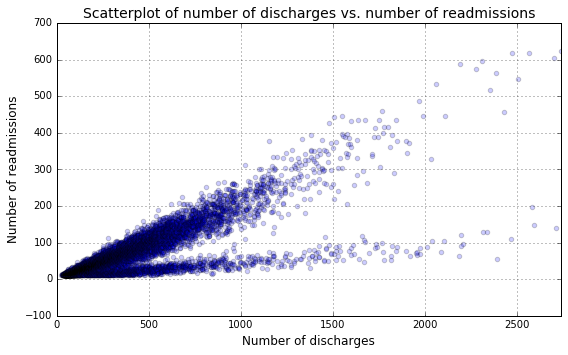

In [8]:
w = list(clean_hospital_read_df['Number of Readmissions'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, w, alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Number of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. number of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

Hospitals/facilities appear to fall fairly neatly into one of two distinct linear relationships between discharges and readmissions. We will see that it is fruitful to examine each of these two groups separately. To do this, we need a method of identifying the groups. As it turns out, this can be done on the basis of each hospital/facility's "predicted readmission rate." Observe the distribution of all predicted readmission rates:

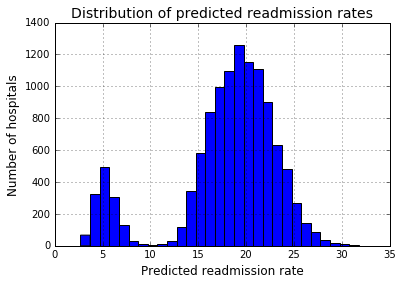

In [9]:
ax = clean_hospital_read_df['Predicted Readmission Rate'].hist(bins=30)
ax.set_xlabel('Predicted readmission rate', fontsize=12)
ax.set_ylabel('Number of hospitals', fontsize=12)
ax.set_title('Distribution of predicted readmission rates', fontsize=14)
None

The distribution is bimodal, with one subset lying mostly below 10, and the other mostly above 10. We now re-create the scatterplot above with these two subgroups plotted distinctly:

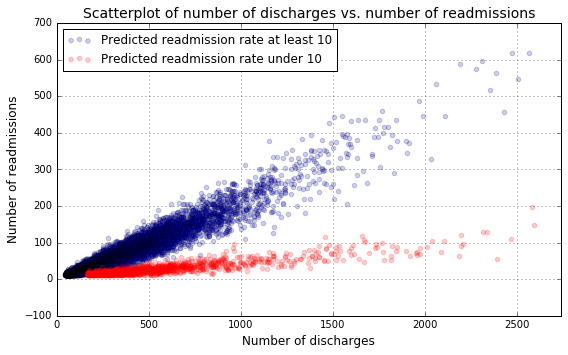

In [10]:
x1 = [a for a in clean_hospital_read_df[clean_hospital_read_df['Predicted Readmission Rate']>=10]['Number of Discharges'][81:-3]]
w1 = list(clean_hospital_read_df[clean_hospital_read_df['Predicted Readmission Rate']>=10]['Number of Readmissions'][81:-3])
x2 = [a for a in clean_hospital_read_df[clean_hospital_read_df['Predicted Readmission Rate']<10]['Number of Discharges'][81:-3]]
w2 = list(clean_hospital_read_df[clean_hospital_read_df['Predicted Readmission Rate']<10]['Number of Readmissions'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x1, w1, alpha=0.2)
ax.scatter(x2, w2, alpha=0.2, color='red')
ax.legend(['Predicted readmission rate at least 10','Predicted readmission rate under 10'], loc = 2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Number of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. number of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

Now, with these two interesting subgroups identified, let's return to the scatterplot upon which the preliminary report is based:

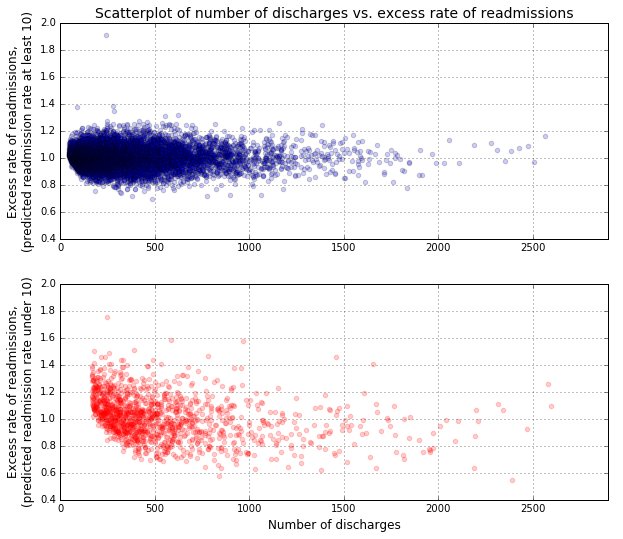

In [11]:
y1 = list(clean_hospital_read_df[clean_hospital_read_df['Predicted Readmission Rate']>=10]['Excess Readmission Ratio'][81:-3])
y2 = list(clean_hospital_read_df[clean_hospital_read_df['Predicted Readmission Rate']<10]['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(9,8))
ax1 = fig.add_subplot(211)
ax1.scatter(x1, y1, alpha=0.2)
ax2 = fig.add_subplot(212)
ax2.scatter(x2, y2, alpha=0.2, color='red')

ax1.set_xlim([0, 2900])
ax1.set_ylim([.4, 2])
ax2.set_xlabel('Number of discharges', fontsize=12)
ax1.set_ylabel('Excess rate of readmissions,\n(predicted readmission rate at least 10)', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
ax2.set_xlim([0, 2900])
ax2.set_ylim([.4, 2])
ax2.set_ylabel('Excess rate of readmissions,\n(predicted readmission rate under 10)', fontsize=12)

ax1.grid(True)
ax2.grid(True)
ax.set_axis_off()
fig.tight_layout()

Based only on the visual above, the preliminary report's central observation &mdash; that the excess readmission ratio is trending down with increasing number of discharges &mdash; is only true for hospitals/facilities with a predicted readmission rate under 10 (shown in red above). For those with a predicted readmission rate of 10 or more, here are the results of a test for linear correlation:

In [12]:
stats.pearsonr(x1,y1)

(-0.0042192091181555615, 0.67244310435510324)

The correlation coefficient is essentially zero, and the large *p*-value indicates no evidence of correlation. However, for hospitals/facilities with a predicted readmission rate under 10, we have the following:

In [13]:
stats.pearsonr(x2,y2)

(-0.31081583790931516, 3.5254073019362219e-30)

There is statistically significant evidence of a negative correlation, not nearly as weak ($r\approx-0.31$) as the original correlation from the preliminary report.

The report identifies "small capacity" (discharges < 300) as a problematic feature, but this is not true of hospitals/facilities with a predicted readmission rate of at least 10:

In [14]:
data = (
    clean_hospital_read_df[
        (clean_hospital_read_df['Number of Discharges']<300) 
        & (clean_hospital_read_df['Predicted Readmission Rate']>=10)
    ]['Excess Readmission Ratio'],
    clean_hospital_read_df[
        (clean_hospital_read_df['Number of Discharges']>1000)
        & (clean_hospital_read_df['Predicted Readmission Rate']>=10)
    ]['Excess Readmission Ratio']
)
ht = DiffMeansPermute(data)
# p-value and actual difference in means:
ht.PValue(iters=10000), ht.actual

(0.78290000000000004, 0.0011067816444561007)

The above result gives no indication that there is any meaningful difference in mean excess readmission ratios between "small capacity" hospitals/facilities and others, within the subgroup where the predicted readmission rate is at least 10. On the other hand, for the other subgroup, we have the following:

In [15]:
data = (
    clean_hospital_read_df[
        (clean_hospital_read_df['Number of Discharges']<300) 
        & (clean_hospital_read_df['Predicted Readmission Rate']<10)
    ]['Excess Readmission Ratio'],
    clean_hospital_read_df[
        (clean_hospital_read_df['Number of Discharges']>1000)
        & (clean_hospital_read_df['Predicted Readmission Rate']<10)
    ]['Excess Readmission Ratio']
)
ht = DiffMeansPermute(data)
# p-value and actual difference in means:
ht.PValue(iters=10000), ht.actual

(0.0, 0.2169162068129873)

There is a statistically and practically significant difference in mean excess readmission ratios for "small capacity" hospitals/facilities here. 

# *In light of all of the above, any policy recommendations that target "small capacity" hospitals/facilities should focus entirely on those with a predicted readmission rate under 10.*